In [1]:
import torch
import rdkit.Chem.Draw
from rdkit import Chem
import matplotlib.pyplot as plt
import numpy as np
import utils
import json

In [2]:
with open("data/name_to_smiles.json") as f:
    name_to_smiles = json.load(f)
smiles_to_name = {v:k for k,v in name_to_smiles.items()}
next(iter(name_to_smiles.items())), next(iter(smiles_to_name.items()))

(('amyl butyrate', 'CCCCCOC(=O)CCC'), ('CCCCCOC(=O)CCC', 'amyl butyrate'))

In [3]:
with open("../dataset/full.json") as f:
    full_data = json.load(f)
full_data[0]

{'mol1': 'CCCCC/C=C/C(=O)OC',
 'mol1_notes': ['violet',
  'sweet',
  'oily',
  'melon',
  'pear',
  'hairy',
  'costus',
  'fruity',
  'violet leaf',
  'waxy',
  'fresh',
  'green'],
 'mol2': 'CCCCCOC(=O)CCC',
 'mol2_notes': ['cherry',
  'sweet',
  'pineapple',
  'fruity',
  'banana',
  'tropical'],
 'blend_notes': ['animal', 'fruity', 'waxy']}

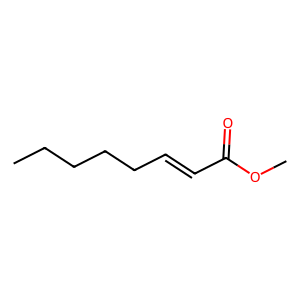

In [4]:
from rdkit import Chem
import rdkit.Chem.Draw

def im_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.Draw.MolToImage(mol)

im_from_smiles(full_data[0]["mol1"])

In [5]:
smiles1 = "CCCC=CC(=O)OC"
smiles2 = "C1CCC(CC1)OC=O"

In [6]:
data = None
for d in full_data:
    if (d["mol1"] == smiles1 and d["mol2"] == smiles2) or (d["mol1"] == smiles2 and d["mol2"] == smiles1):
        data = d

assert data
data

{'mol1': 'C1CCC(CC1)OC=O',
 'mol1_notes': ['banana',
  'sweet',
  'cherry',
  'fruity',
  'cooling',
  'jammy',
  'ethereal'],
 'mol2': 'CCCC=CC(=O)OC',
 'mol2_notes': ['fatty', 'pineapple', 'fruity', 'earthy', 'green'],
 'blend_notes': ['ethereal', 'green', 'earthy', 'fatty', 'fruity']}

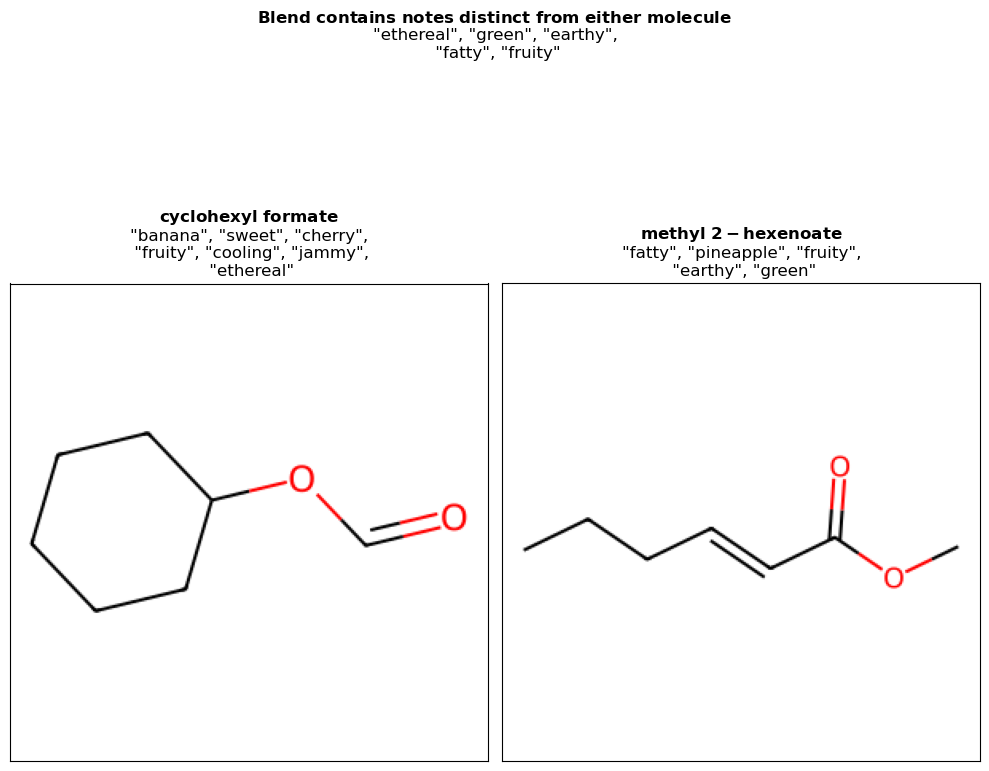

In [21]:
import matplotlib.pyplot as plt

bp = 3
def format_long_notes(notes):
    notes = [f"\"{note}\"" for note in notes]
    if len(notes) < 3:
        return ', '.join(notes)
#     result = ""
#     for s in range(0,len(notes),bp):
#         result += ', '.join(notes[s*bp:(s+1)*bp]) + ",\n"
        
#     return result[:-4]
    formatted_strings = [f'{s},' if i % 3 != 2 else f'{s},\n' for i, s in enumerate(notes)]
    return ' '.join(formatted_strings).strip()[:-1]
        # return ', '.join(notes[:3]) + ",\n" +  ', '.join(notes[3:])

def format(name,notes):
    # Matplotlib is annoying and combines words used in a single bf mathtext.
    # Split, bold, then rejoin.
    return f"{name}\n{format_long_notes(notes)}"


def make(fname,data,title):
    # plt.rc('text', usetex=True)
    fig, axarr = utils.standard_fig_ax(1,2)
    axarr[0].imshow(im_from_smiles(data["mol1"]))
    axarr[0].set_title(format(f"{bold(smiles_to_name[data['mol1']])}",data['mol1_notes']))
    axarr[1].imshow(im_from_smiles(data["mol2"]))
    axarr[1].set_title(format(f"{bold(smiles_to_name[data['mol2']])}",data['mol2_notes']))
    # Remove ticks but keep boxes around molecules.
    for ax in axarr:
        ax.set_xticks([])
        ax.set_yticks([])

    fig.suptitle(format(title,data["blend_notes"]))
    plt.tight_layout()
    utils.save_figures("blendedpair",fig)
    plt.show()
    
def bold(sentence):
    # Matplotlib is annoying and combines words used in a single bf mathtext.
    # Split, bold, then rejoin.
    return " ".join([r'$\bf{' + w + '}$' for w in sentence.split()])

make("pair",data,bold("Blend contains notes distinct from either molecule"))